In [145]:
import pandas as pd
import numpy as np

data = pd.read_csv("./exam_score.csv")


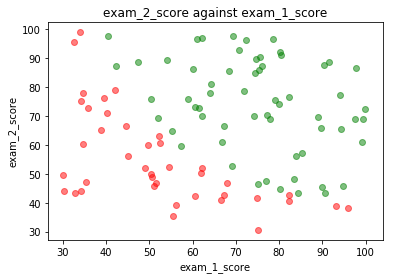

In [146]:
import matplotlib.pyplot as plt

# Since there is 2 set of features, there is 2 axis

y = data["accepted_by_university"]

admit_successful_features = data.loc[y == 0][["exam_1_score","exam_2_score"]]
admit_failed_features = data.loc[y == 1][["exam_1_score","exam_2_score"]]

plt.title("exam_2_score against exam_1_score")
plt.xlabel("exam_1_score")
plt.ylabel("exam_2_score")
plt.scatter(admit_successful_features["exam_1_score"], admit_successful_features["exam_2_score"], color="red", alpha=0.5)
plt.scatter(admit_failed_features["exam_1_score"], admit_failed_features["exam_2_score"], color="green", alpha=0.5)

plt.show()

X = data[["exam_1_score","exam_2_score"]]

In [147]:
#Concatenate an array of one into X which has shape of (100,2) initially to make it multiplicable with the bias
X = np.c_[np.ones([X.shape[0],1]), X]

In [148]:
# Dataframe(which is originally a matrices already) 
Y = np.array(data[["accepted_by_university"]])[:,np.newaxis] 
theta = np.zeros((X.shape[1], 1))

In [149]:
def sigmoid(x):
    # sigmoid(m1x1 + m2x2 + b)
    return 1 / (1 + np.exp(-x))

def net_input(theta, x):
    # features matrix * weight matrix
    return np.dot(x, theta)

def probability(theta, x):
    # sigmoid(features matrix * weight matrix)
    return sigmoid(net_input(theta,x))
    

In [150]:
def gradient(theta, x, y):
    # slope = {features^T * ((features * weight) - label) } / Number of data
    number_of_data = x.shape[0]
    return (1 / number_of_data) * np.dot(x.T, probability(theta,x) - y)

def cost_function(theta, x, y):
    # Computes the cost function for all the training samples
    m = x.shape[0]
    total_cost = -(1 / m) * np.sum(
        y.T * np.log(probability(theta, x)) + (1 - y).T * np.log(
            1 - probability(theta, x)))
    return total_cost
    

In [173]:
from scipy.optimize import fmin_tnc
def fit(x, y, theta):
    opt_weights = fmin_tnc(func=cost_function, x0=theta,
                  fprime=gradient,args=(x,y.flatten()))
    return opt_weights[0]

def predict(x):
    theta = parameters[:, np.newaxis]
    prob = probability(theta, x)
    if prob >= 0.5:
        return "Yes, he/she will be able to enter university."
    else:
        return "No, he/she will not be able to enter university."


In [174]:
parameters = fit(X, Y, theta)

In [176]:
predict([1, 95.86155507093572,38.22527805795094])

'Yes, he/she will be able to enter university.'

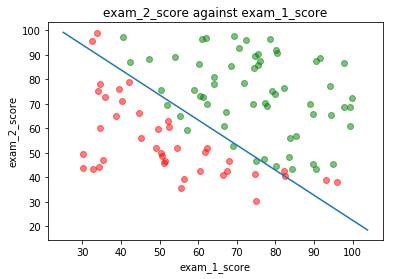

In [178]:
import matplotlib.pyplot as plt

# Since there is 2 set of features, there is 2 axis

y = data["accepted_by_university"]

admit_successful_features = data.loc[y == 0][["exam_1_score","exam_2_score"]]
admit_failed_features = data.loc[y == 1][["exam_1_score","exam_2_score"]]

plt.title("exam_2_score against exam_1_score")
plt.xlabel("exam_1_score")
plt.ylabel("exam_2_score")
plt.scatter(admit_successful_features["exam_1_score"], admit_successful_features["exam_2_score"], color="red", alpha=0.5)
plt.scatter(admit_failed_features["exam_1_score"], admit_failed_features["exam_2_score"], color="green", alpha=0.5)

# Plotting Decision Boundary after setting m1x1 + m2x2 + b = 0
x_values = [np.min(X[:, 1] - 5), np.max(X[:, 2] + 5)]
y_values = - (parameters[0] + np.dot(parameters[1], x_values)) / parameters[2]
plt.plot(x_values, y_values, label='Decision Boundary')

plt.show()
